In [8]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm
from PIL import Image

In [1]:
main_dir = "/home/integral-m/Рабочий стол/example/"

In [17]:
def add_colored_dilate(image, mask_image, dilate_image):
    mask_image_gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
    dilate_image_gray = cv2.cvtColor(dilate_image, cv2.COLOR_BGR2GRAY)
    
    mask = cv2.bitwise_and(mask_image, mask_image, mask=mask_image_gray)
    dilate = cv2.bitwise_and(dilate_image, dilate_image, mask=dilate_image_gray)
    
    mask_coord = np.where(mask!=[0,0,0])
    dilate_coord = np.where(dilate!=[0,0,0])

    mask[mask_coord[0],mask_coord[1],:]=[255,0,0]
    dilate[dilate_coord[0],dilate_coord[1],:] = [0,0,255]

    ret = cv2.addWeighted(image, 0.7, dilate, 0.3, 0)
    ret = cv2.addWeighted(ret, 0.7, mask, 0.3, 0)

    return ret

def add_colored_mask(image, mask_image):
    mask_image_gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
    
    mask = cv2.bitwise_and(mask_image, mask_image, mask=mask_image_gray)
    
    mask_coord = np.where(mask!=[0,0,0])

    mask[mask_coord[0],mask_coord[1],:]=[255,0,0]

    ret = cv2.addWeighted(image, 0.7, mask, 0.3, 0)

    return ret

def diff_mask(ref_image, mask_image):
    mask_image_gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
    
    mask = cv2.bitwise_and(mask_image, mask_image, mask=mask_image_gray)
    
    mask_coord = np.where(mask!=[0,0,0])

    mask[mask_coord[0],mask_coord[1],:]=[255,0,0]

    ret = cv2.addWeighted(ref_image, 0.7, mask, 0.3, 0)
    return ret



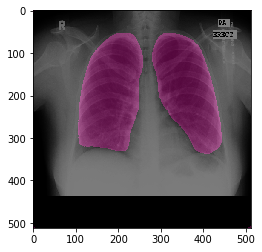

In [42]:
plt.imshow(add_colored_dilate(image,mask,mask))

In [57]:
plt.rc('figure', figsize=[15,8])

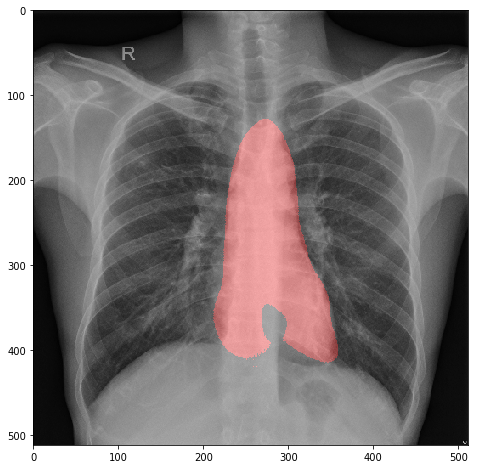

In [58]:
plt.imshow(diff_mask(image,mask))

In [50]:
image = cv2.imread(main_dir+"CHNCXR_0657_1.png")
mask = cv2.imread(main_dir+"CHNCXR_0657_1_predict.png")

In [51]:
image = cv2.resize(image,(512,512))

In [39]:
image.shape

(512, 512, 3)

In [34]:
mask.shape

(512, 512, 3)

In [22]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [5]:
for element in os.listdir(main_dir):
    print element

CHNCXR_0657_1.png
0_montgomery_predict.png
CHNCXR_0656_1.png
3_onco_predict.png
0_onco.png
2_onco.png
CHNCXR_0661_1_predict.png
CHNCXR_0661_1.png
CHNCXR_0658_1.png
CHNCXR_0659_1.png
CHNCXR_0658_1_predict.png
CHNCXR_0659_1_predict.png
2_montgomery.png
0_montgomery.png
CHNCXR_0662_1_predict.png
CHNCXR_0657_1_predict.png
2_onco_predict.png
CHNCXR_0656_1_predict.png
2_montgomery_predict.png
CHNCXR_0660_1.png
CHNCXR_0660_1_predict.png
0_onco_predict.png
3_onco.png
CHNCXR_0662_1.png


In [100]:
fluro1 = cv2.imread(main_dir+"0_montgomery.png")
fluro1 = cv2.resize(fluro1,(512,512))
lbl1 = cv2.imread(main_dir+"0_montgomery_predict.png")
dif_lbl1 = diff_mask(fluro1,lbl1)


fluro2 = cv2.imread(main_dir+"2_montgomery.png")
fluro2 = cv2.resize(fluro2,(512,512))
lbl2 = cv2.imread(main_dir+"2_montgomery_predict.png")
dif_lbl2 = diff_mask(fluro2,lbl2)


fluro3 = cv2.imread(main_dir+"2_onco.png")
fluro3 = cv2.resize(fluro3,(512,512))
lbl3 = cv2.imread(main_dir+"2_onco_predict.png")
dif_lbl3 = diff_mask(fluro3,lbl3)


fluro4 = cv2.imread(main_dir+"3_onco.png")
fluro4 = cv2.resize(fluro4,(512,512))
lbl4 = cv2.imread(main_dir+"3_onco_predict.png")
dif_lbl4 = diff_mask(fluro4,lbl4)


fluro5 = cv2.imread(main_dir+"0_onco.png")
fluro5 = cv2.resize(fluro5,(512,512))
lbl5 = cv2.imread(main_dir+"0_onco_predict.png")
dif_lbl5 = diff_mask(fluro5,lbl5)

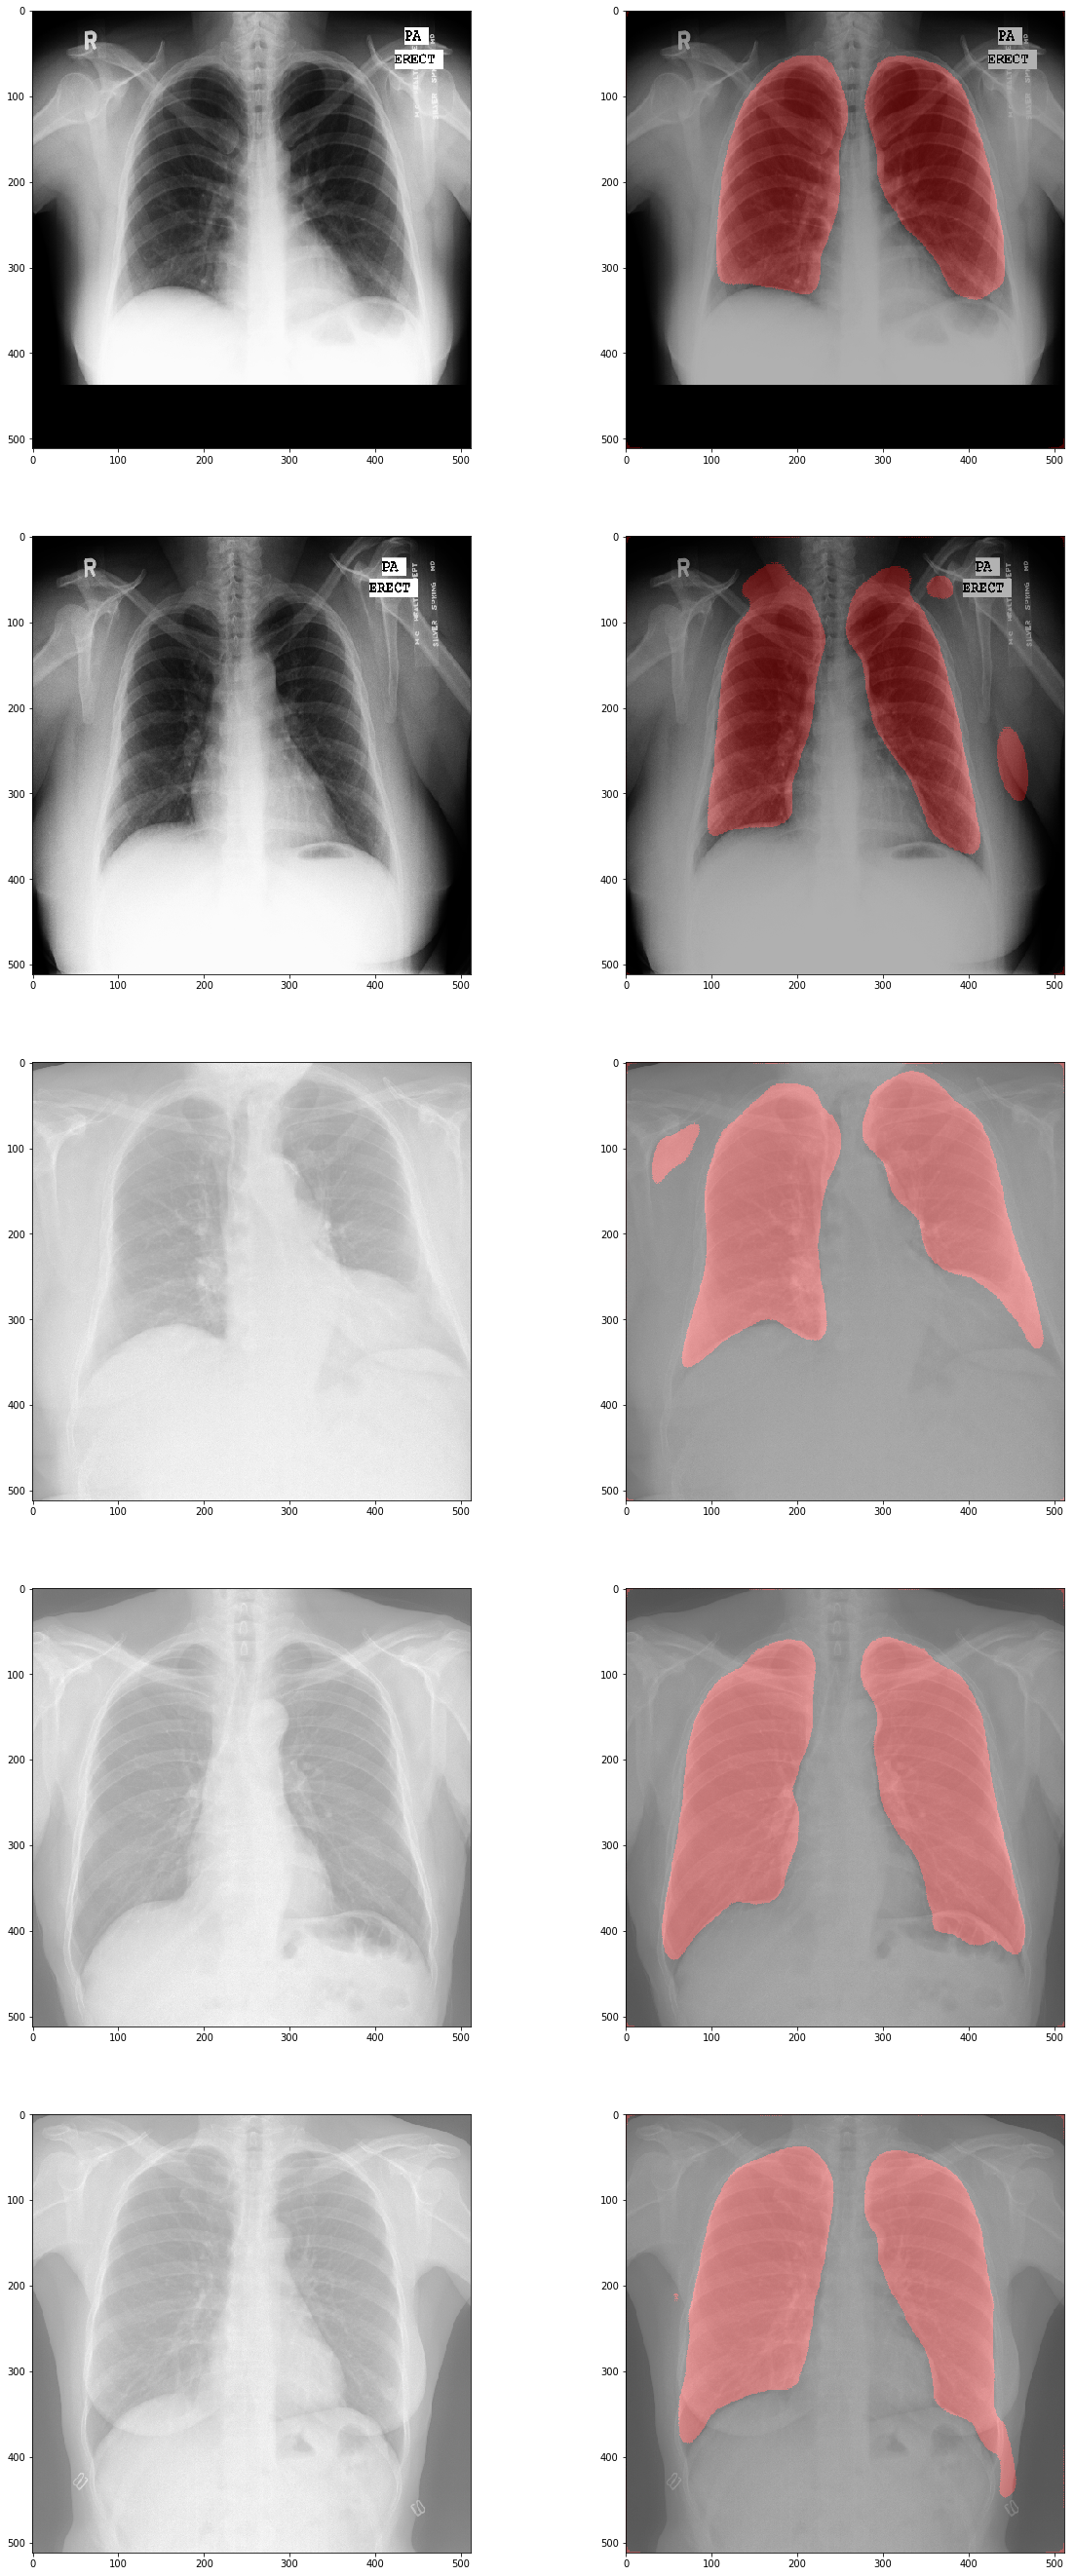

In [102]:
fig, axs = plt.subplots(5, 2, figsize=(20, 48))

axs[0, 0].imshow(fluro1)
axs[0, 1].imshow(dif_lbl1)

axs[1, 0].imshow(fluro2)
axs[1, 1].imshow(dif_lbl2)

axs[2, 0].imshow(fluro3)
axs[2, 1].imshow(dif_lbl3)

axs[3, 0].imshow(fluro4)
axs[3, 1].imshow(dif_lbl4)

axs[4, 0].imshow(fluro5)
axs[4, 1].imshow(dif_lbl5)


In [95]:
image1 = cv2.imread(main_dir+"CHNCXR_0657_1.png")
image1 = cv2.resize(image1,(512,512))
mask1 = cv2.imread(main_dir+"CHNCXR_0657_1_predict.png")
dif_mask1 = diff_mask(image1,mask1)

image2 = cv2.imread(main_dir+"CHNCXR_0656_1.png")
image2 = cv2.resize(image2,(512,512))
mask2 = cv2.imread(main_dir+"CHNCXR_0656_1_predict.png")
dif_mask2 = diff_mask(image2,mask2)

image3 = cv2.imread(main_dir+"CHNCXR_0661_1.png")
image3 = cv2.resize(image3,(512,512))
mask3 = cv2.imread(main_dir+"CHNCXR_0661_1_predict.png")
dif_mask3 = diff_mask(image3,mask3)

image4 = cv2.imread(main_dir+"CHNCXR_0658_1.png")
image4 = cv2.resize(image4,(512,512))
mask4 = cv2.imread(main_dir+"CHNCXR_0658_1_predict.png")
dif_mask4 = diff_mask(image4,mask4)

image5 = cv2.imread(main_dir+"CHNCXR_0659_1.png")
image5 = cv2.resize(image5,(512,512))
mask5 = cv2.imread(main_dir+"CHNCXR_0659_1_predict.png")
dif_mask5 = diff_mask(image5,mask5)

image6 = cv2.imread(main_dir+"CHNCXR_0662_1.png")
image6 = cv2.resize(image6,(512,512))
mask6 = cv2.imread(main_dir+"CHNCXR_0662_1_predict.png")
dif_mask6 = diff_mask(image6,mask6)

image7 = cv2.imread(main_dir+"CHNCXR_0660_1.png")
image7 = cv2.resize(image7,(512,512))
mask7 = cv2.imread(main_dir+"CHNCXR_0660_1_predict.png")
dif_mask7 = diff_mask(image7,mask7)

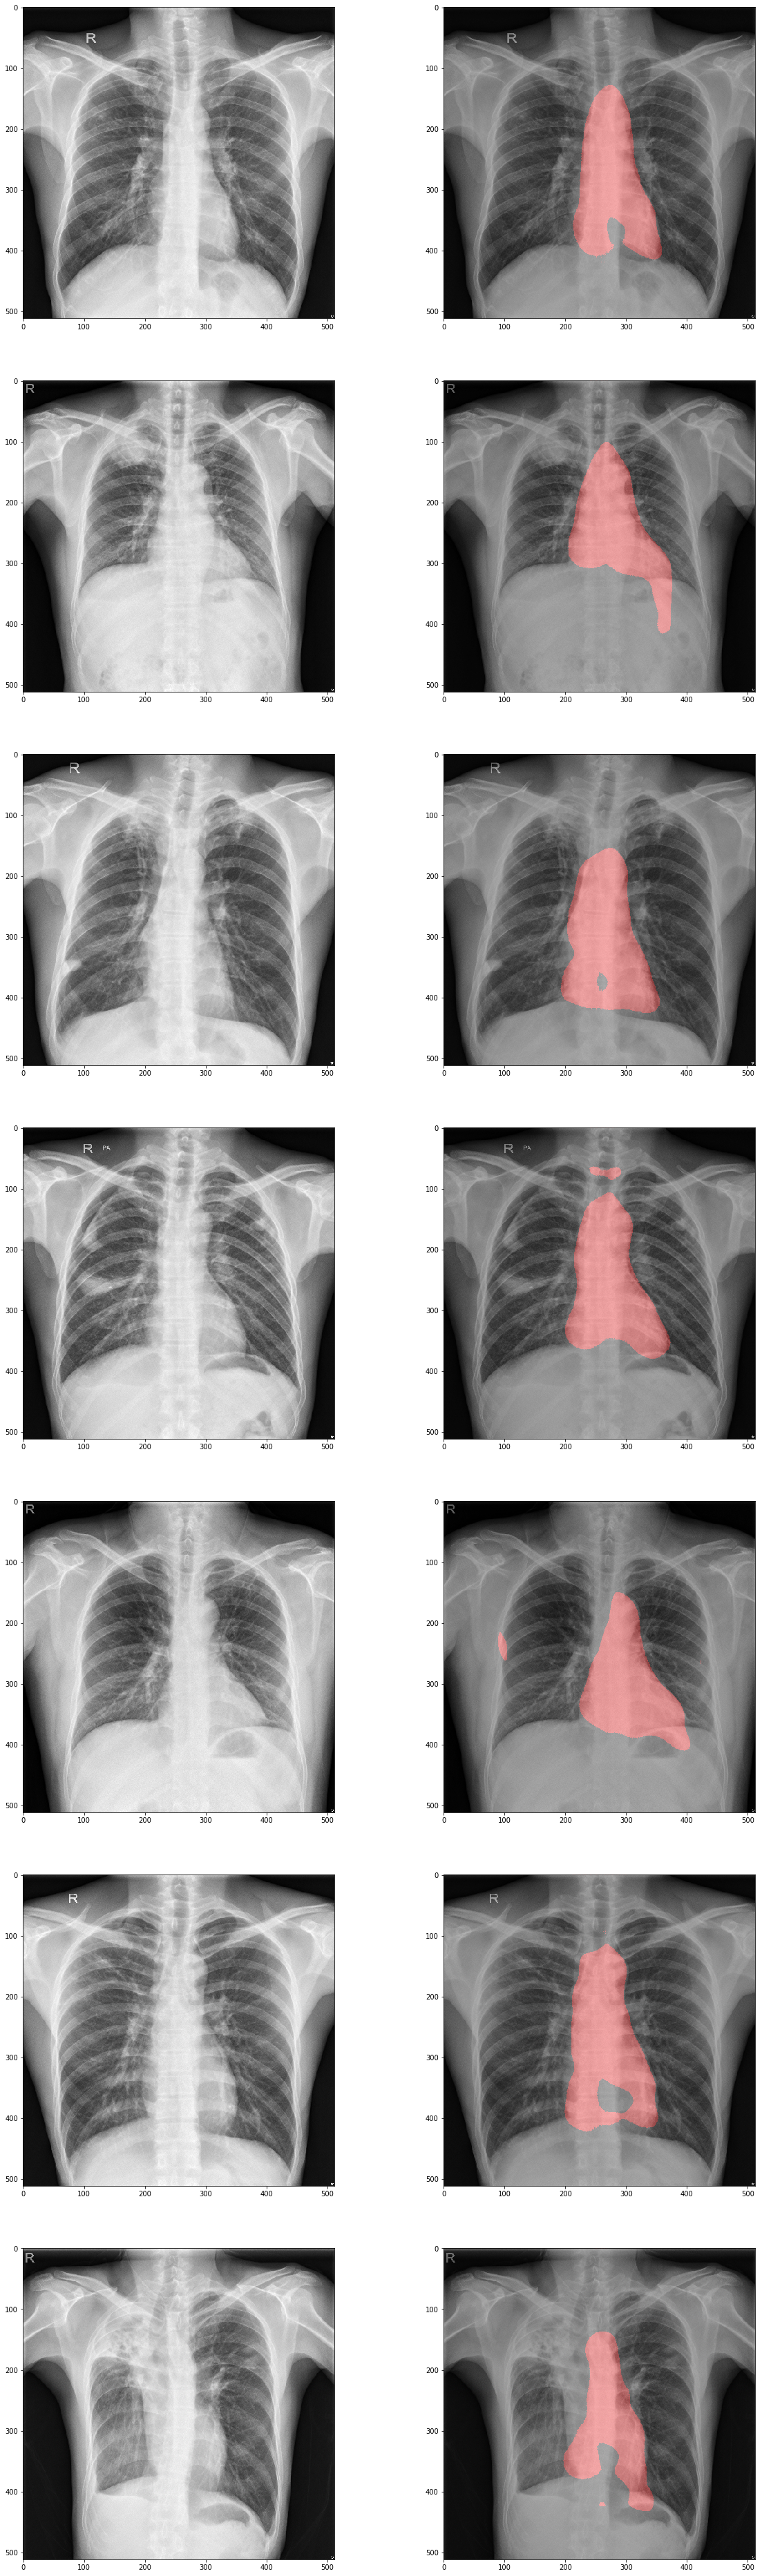

In [123]:
#heart seven

fig, axs = plt.subplots(7, 2, figsize=(20, 68))

axs[0, 0].imshow(image1)
axs[0, 1].imshow(dif_mask1)

axs[1, 0].imshow(image2)
axs[1, 1].imshow(dif_mask2)

axs[2, 0].imshow(image3)
axs[2, 1].imshow(dif_mask3)

axs[3, 0].imshow(image4)
axs[3, 1].imshow(dif_mask4)

axs[4, 0].imshow(image5)
axs[4, 1].imshow(dif_mask5)

axs[5, 0].imshow(image6)
axs[5, 1].imshow(dif_mask6)

axs[6, 0].imshow(image7)
axs[6, 1].imshow(dif_mask7)


In [103]:
def clean_array(img):
    array = np.asarray(Image.open(img))
    new_array = []
    array = np.concatenate(array)
    for element in array:
        if element<120:
            new_array+=[0]
        else:
            new_array+=[250]
    return np.asarray(new_array).reshape(np.asarray(Image.open(img)).shape)


def roof_floor(array):
    floor = 0
    for element in array:
        if max(element) == 0:
            floor+=1
        else:
            break
    roof = 0
    for element in reversed(array):
        if max(element) == 0:
            roof+=1
        else:
            break
    floor_array = array[floor:int(array.shape[0])- roof]
    return floor_array


def half_mask(array):
    max_num = []
    for element in array:
        max_num+= [max(element)]
    mask_array = array/(max(max_num))
    half_mask = []
    for i in range(3*len(mask_array)/4, len(mask_array)):
        half_mask+=[mask_array[i]]
    half_mask = np.asarray(half_mask)
    return half_mask


def where_center_is(array):
    i = 0
    for element in array:
        if element == 0:
            i+=1
        else:
            break
    n=0
    for element in array[i:len(array)]:
        if element == 1:
            n+=1
        else:
            break
    j = 0
    for element in reversed(array):
        if element == 0:
            j+=1
        else:
            break
    k = 0
    for element in reversed(array[0:len(array)-j]):
        if element == 1:
                k+=1
        else:
            break
    return (i+n)+(int(len(array))-(j+k)-(i+n))/2



def left_heart(matrix):  
    n = []
    m = 0
    for element in matrix:
        m=0
        for i in reversed(element[0:int(where_center_is(matrix[0]))]):
            if i == 0:
                m+=1
            else:
                n+=[m]
                m=0
                break
    return n


def right_heart(matrix):
    n = []
    m = 0
    for element in matrix:
        m=0
        for i in element[int(where_center_is(matrix[0])):len(element)]:
            if i == 0:
                m+=1
            else:
                n+=[m]
                m=0
                break
    return n


def max_in_dict(matrix):
    f = {}
    l = []
    for i in range(1,len(matrix)):
        #print i,abs(a[i-1]-a[i])
        f[matrix[i-1]] = abs(matrix[i-1]-matrix[i])
        l+= [abs(matrix[i-1]-matrix[i])]
    for key,value in f.items():
        if value == max(l):
            return key

def count_zero_board(matrix):
    n= []
    m = 0
    for element in matrix:
        m=0
        for i in element:
            if i == 0:
                m+=1
            else:
                n+=[m]
                m=0
                break
    return min(n)


def count_zero_board_reverse(matrix):
    n= []
    m = 0
    for element in matrix:
        m=0
        for i in reversed(element):
            if i == 0:
                m+=1
            else:
                n+=[m]
                m=0
                break
    return min(n)

In [104]:
def cardio_index(image):   
    cut_mask = roof_floor(clean_array(image))
    cut_mask = half_mask(cut_mask)
    left_part = max_in_dict(left_heart(cut_mask))
    right_part = max_in_dict(right_heart(cut_mask))
    left_corner = count_zero_board(cut_mask)
    right_corner = count_zero_board_reverse(cut_mask)
    return str(round(float(left_part+right_part)/\
        (len(cut_mask[0])-left_corner+right_corner),3)*100)+' %'

In [110]:
cardio_index(main_dir+"0_montgomery_predict.png")

'38.6 %'

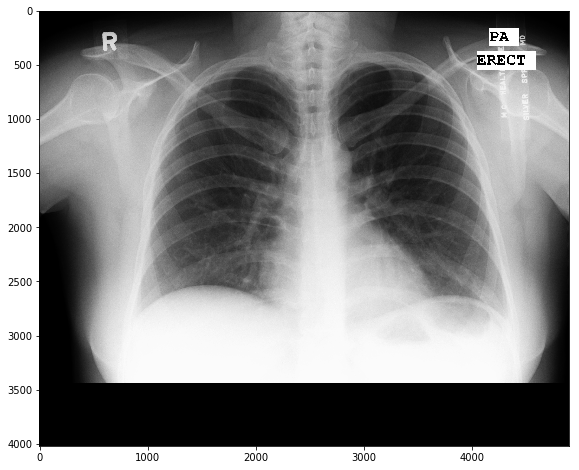

In [112]:
plt.imshow(Image.open(main_dir+"0_montgomery.png"))

In [113]:
cardio_index(main_dir+'2_montgomery_predict.png')

'49.9 %'

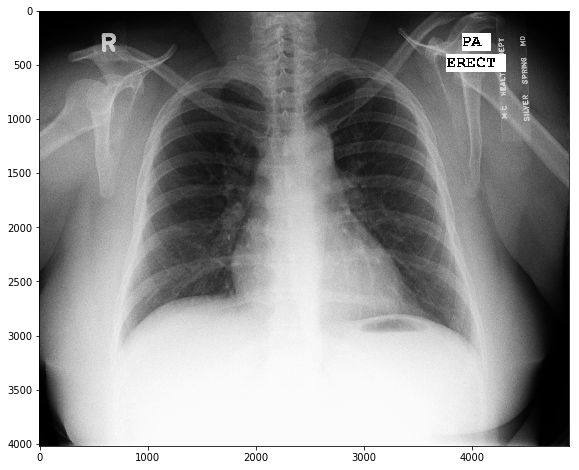

In [114]:
plt.imshow(Image.open(main_dir+"2_montgomery.png"))

In [118]:
cardio_index(main_dir+'2_onco_predict.png')

'53.4 %'

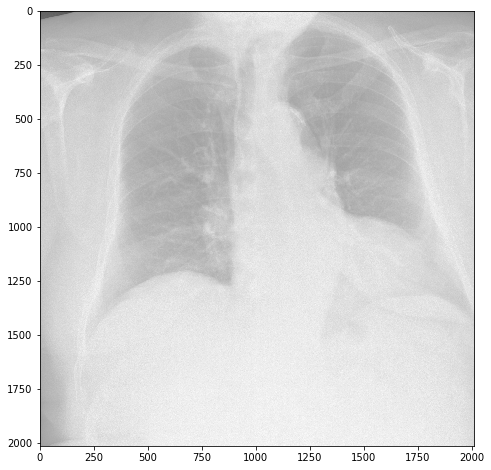

In [119]:
plt.imshow(Image.open(main_dir+"2_onco.png"))

In [120]:
cardio_index(main_dir+'3_onco_predict.png')

'47.1 %'

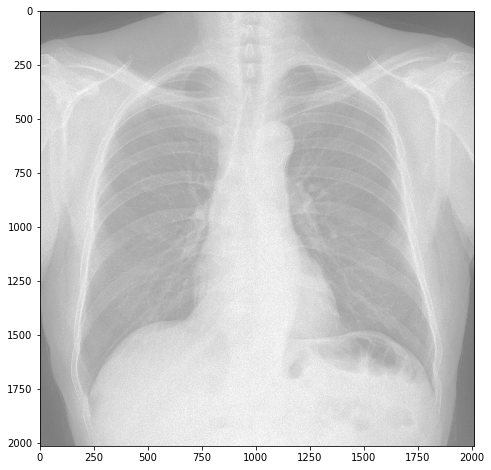

In [121]:
plt.imshow(Image.open(main_dir+"3_onco.png"))